<center><h2>Introduction to Logistic Regression</h2></center>
<center><h2>By Brian Spiering</h2></center>


<center><h2>Motivating Story</h2></center>
<br>
<br>
<center>Are these malignant or benign cells?</center>
<center><img src="images/This-is-a-magnified-image-of-a-malignant-breast-FNA-The-visible-cell-nuclei-have-been.png" width="75%"/></center>

<center><a href="https://www.researchgate.net/figure/This-is-a-magnified-image-of-a-malignant-breast-FNA-The-visible-cell-nuclei-have-been_fig1_2302195">Image source</a></center>
<br>
<br>
Imagine you are working as a Data Scientist at a medical research company. You are helping medical professionals decided if tissue biopsy  images contain cells that are malignant or benign. This task is directly related to a cancer diagnosis. 

You do not have enough labeled data for deep learning. You have collaborated with domain experts to extract information about cell nucleus properties.

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) <br>
b) texture (standard deviation of gray-scale values) <br>
c) perimeter <br>
d) area <br>
e) smoothness (local variation in radius lengths) <br>
f) compactness (perimeter^2 / area - 1.0) <br>
g) concavity (severity of concave portions of the contour) <br>
h) concave points (number of concave portions of the contour) <br>
i) symmetry <br>
j) fractal dimension ("coastline approximation" - 1) <br>



<center><h2>Learning Outcomes</h2></center>

__By the end of this session, you should be able to__:

- Describe logistic regression in your own words.
- Write and explain the formula for logistic regression.
- Make a prediction with a trained logistic regression model.
- Draw the decision boundary for logistic regression.
- List when and when not to use logistic regression.


<center><h2>Linear Regression Review</h2></center>

Let's do a quick review of linear regression.

Let's predict the target as the symmetry of the cell nucleus (continuous valued). 

Features will be properties of the cell nucleus: radius, texture, smoothness ….
<br>
<br>
<center>Data: A single feature predicts a target</center>
<center><img src="images/15642961290066_logr_gen_1.png" width="75%"/></center>

Supervised learning algorithm because each data point has a label / target value.

<center>Best fit line</center>
<br>
<center><img src="images/15642962536507_logr_gen_2.png" width="75%"/></center>

<center><h2>Linear regression: Mathematical formalism</h2></center>

Model it as a linear combination of one or more features:

$$ ŷ = β_0 + β_1x_1 + … + β_px_p = β_0 + \sum_{i=1}^{p} β_ix_i = β_0 + \vec{x^T} \vec{β}$$

The $β_0$ term is non elegant (aka, kinda awkward).  
Let's clean it up with "add vector of 1s" technique.

$$\vec{x} = [1, x_1, x_2, …, x_p]$$

$$\vec{β} = [β_0, β_1, β_2, …, β_p]$$

$$ ŷ = \vec{x^T} \vec{β}$$

or commonly notated as

$$ ŷ = xβ$$


<center><h2>Linear regression: Loss function</h2></center>

$$ MSE(β) = \frac{1}{n}\sum_{i=1}^{n} (y_i - ŷ_i)^2 $$

<center>Best fit line</center>
<center><img src="images/15642962536507_logr_gen_2.png" width="75%"/></center>

<center>Make prediction</center>
<center><img src="images/15643029750927_logr_gen_3.png" width="75%"/></center>

<center><h2>Any questions about linear regression?</h2></center>

<center><h2>Logistic Regression: Different kind of target</h2></center>

For binary classification, target variable (y) can take one of two discrete outcomes (classes):

- Yes / No
- Present / Absent
- Pass / Fail
- Win / Loss
- Go / No go
- Malignant / Benign

We have to encode it as indicator variable: 0 or 1.

The goal is train a binary classifier to be make decision about the class of a new observation.

Also, a supervised learning algorithm because each data point has a label / target value.

<center><h2>Comparing Linear Regression to Logistic Regression</h2></center>

<br>
<center><img src="images/1_Ubge8qVlc4Xk58H1oMp4Zw.jpeg" width="75%"/></center>



Linear regression fits a line to the data.

Logistic regression fits a logistic function / "S" shaped curve to the data.

<center><h2>Logistic Function</h2></center>

<br>
<center><img src="images/logistic_function_graph.png" width="75%"/></center>

Also called sigmoid function.

The sigmoid functions takes continuous input values and output values 0 to 1.

I like calling it the squashing function - It squashes the values to bound them 0 and 1.

Sigmoid generates a smooth transition from class 0 to class 1 by giving probability of class 1:

$$ P(y=1 | x)$$

<center><h2>Logistic Function: Mathematical formalism</h2></center>


Sigmoid function:  

$$ σ (z) = \frac{1}{1+ℯ^{-z}} = \frac{ℯ^z}{1+ℯ^z}$$

e is a mathematical constant whic is ~2.718.

Substituting the vectorized linear equations into sigmoid function:

$$ σ(xβ) = \frac{1}{1+ℯ^{-xβ}} = \frac{ℯ^{xβ}}{1+ℯ^{xβ}}$$

The result is probability of class 1 for given instance:

$$σ(x_iβ) = P(y=1 | x_i)$$

<center><h2>Logistic Function: Loss function</h2></center>

The goal of the loss is to find the parameters $β$ that maximize the probability of the true y labels {0, 1} in the training data given the observations $x$. 

Let's define the loss function and then solve for β that gives minimum loss value.

$$   Likelihood(β) = \prod\limits_{i=1}^n
\begin{cases}
P(x_i;β)  \text{    if $y_i$ = 1 }\\
1- P(x_i;β) \text{ if $y_i$ = 0 }
\end{cases}
$$

Products are computational complex and sometimes result in numerical underflow errors.

So let's convert product to summation by taking the log:

$$   Likelihood(β) = \sum_{i=1}^n
\begin{cases}
log(P(x_i;β))  \text{    if $y_i$ = 1 }\\
log(1- P(x_i;β)) \text{ if $y_i$ = 0 }
\end{cases}
$$

We can either maximize the log of likelihood function or minimize the negative of log likelihood.

Typically it is optimized through gradient descent (I'm going to save gradient descent for another time) so we want to minimize the negative of log likelihood.

Also called the cross-entropy loss.

<center><h2>How do we make a decision? </h2></center>

We need to make a decision about specific image. Given cell properties, do we predict malignant or benign?

We have a trained model $P(y=1|x)$.

Given a specific example (an instance with certain feature values), 

<br>
<center><img src="images/prediction.png" width="75%"/></center>

For a specific instance $x_i$, we say yes if the probability P(y = 1|x) is more than threshold and no otherwise. We call the threshold the decision boundary:

$$   decision =
\begin{cases}
1  & \text{if P(y=1|x) > threshold} \\
0 & \text{otherwise}
\end{cases}
$$

Typically, the threshold is 0.5. But the threshold should be adjust for the business requirements.

In other words, the logistic regression model itself simply models probability of output (target label) in terms of input (vectorized features). The logistic regression model does not perform statistical classification and is not a classifier.

The logistic regression model can be used to make a classifier by adding a threshold or decision value.

<center><h2>Decision Boundary</h2></center>

<br>
<center><img src="images/boundary.png" width="75%"/></center>

In classification problems with two or more classes, a decision boundary is a hypersurface that separates the underlying vector space into sets, one for each class

For logistic regression it will be hyperplane, aka straight line.

<br>
<center><img src="images/moons.png" width="75%"/></center>

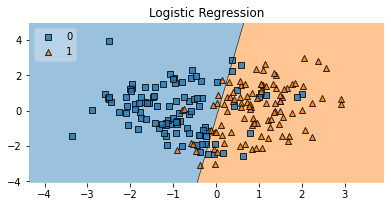

In [20]:
import matplotlib.pyplot   as plt
import matplotlib.gridspec as gridspec
from   mlxtend.plotting     import plot_decision_regions
from   sklearn.linear_model import LogisticRegression
from   sklearn.datasets     import make_classification, make_circles, make_moons
%matplotlib inline  

X, y = make_classification(n_samples=200, 
               n_features=2, 
               n_informative=2,
               n_redundant=0, 
               n_classes=2, 
               random_state=42)

# X, y = make_moons(n_samples=200, 
#                   random_state=42)

# X, y = make_circles(n_samples=200, 
#                   random_state=42)


clf1 = LogisticRegression()
gs = gridspec.GridSpec(3, 2)
 
fig = plt.figure(figsize=(14,10))
 
labels = ['Logistic Regression']

for clf, lab, grd in zip([clf1], labels,[(0,0)]):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)
 
plt.show()

<center><h2>When to use logistic regression</h2></center>

Overall - logistic regression is a relatively simple algorithm that empirically performs well on a wide range of problems.

It is good choice for an "advanced" baseline model.

It is relatively straightforward to interpret the coefficients and the entire model.

It is fast to both train and predict.

It predicts the probability of class membership which is useful (some other classification algorithms do not inherently generate probabilities.

It is a common algorithm so there is common ground for communicate and almost all established libraries support an implementation.

<center><h2>When to not use logistic regression</h2></center>

Since it is simple, it often will not yield the best performance in an evaluation metric.

It requires a lot of feature engineering. Features should be standardized - rescaled to be between 0 and 1. Feature standardized is useful for optimization and for regularization. The coefficients need to be explicitly defined, either by hand or programmatically.

Since it learns a hyperplane, assumes there is a linear separation between target classes.

Completely fails when there are non-linear separable targets:
<br>
<center><img src="images/circles.png" width="75%"/></center>

<center><h2>Check for understanding</h2></center>

Logistic regression mainly used for regression problems.

A) True  👍    
B) False 😮

Solution: B

Logistic regression is a classification algorithm. It is poorly named. 



<center><h2>Check for understanding</h2></center>

Which of the following methods do we use to best fit the data in Logistic Regression?

A) Least Square Error  👏   
B) Maximum Likelihood  😂  
C) Cosine distance     ❤️  

Solution is: B Maximum Likelihood. 

We have defined a the likelihood as the probability of making a correct prediction and want to be as high as possible.

<center><h2>What to learn next</h2></center>

- Gradient descent to optimize a loss function.
- Regularization by adding a penalty term to loss function.
- Evaluation metrics for classification.
- Multi-class classification.
- Build deep neural networks by stacked logistic regressions.

<center><h2>Takeaways</h2></center>

- Logistic regression is the classification version of linear regression.
- It uses the sigmoid function to make predict for probability of the positive class (aka, encoded as $1$).
- Logistic regression learns a hyperplane (a straight decision boundary in feature space).
- Logistic regression is a simple (but useful) model.

<br>
<br> 
<br>

----

<center><h2>Sources of Inspiration</h2></center>

- https://medium.com/@sitingkoh1808/metis-project-5-prediction-of-breast-cancer-d2bb3e89e31f
- https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
- https://github.com/parrt/msds621
- https://openclassrooms.com/en/courses/6389626-train-a-supervised-machine-learning-model/6405876-understand-the-logistic-regression-algorithm
- [Speech and Language Processing (3rd edition) by Jurafsky and Martin](https://web.stanford.edu/~jurafsky/slp3/)
- https://en.wikipedia.org/wiki/Logistic_regression
- https://www.analyticsvidhya.com/blog/2017/08/skilltest-logistic-regression/
- https://predictivehacks.com/decision-boundary-in-python/
- https://www.youtube.com/watch?v=F_VG4LNjZZw&ab_channel=ArtificialIntelligence-AllinOne

<center><h2>Bonus Material</h2></center>



<center><h2>Can you fit logistic regression with categorical variables?</h2></center>

Yes - typically you one-hot encode them.

The parameter (or weight) of each categorical is how much the presence of that feature impact the probability of class 1.

The can be visualized with a bar plot with each bar representing the estimated probability of observing a specific outcome in that condition. 

In [22]:
# The empirical dataset from the motivating story
# Try to fit with a logistic regression!
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

<center><h2>Extending logistic regression to build deep neural networks</h2></center>

<br>
<center><img src="images/function_3.png" width="75%"/></center>

<br>
<center><img src="images/stacked.png" width="75%"/></center>

<center><h2>Logistic Function</h2></center>

Logistic Function is differentiable which is handy for learning.

The sigmoid function has the property:

$$1−σ(x) = σ(−x)$$

thus  we could also have expressed P(y = 0) as σ (−𝑥β)

<center><h2>Odds</h2></center>
Given:
$$ p(x) = σ(xβ) = \frac{1}{1+ℯ^{-xβ}} $$
and:
$$ odds = \frac{p}{1-p} $$

Substitute in 𝑝(𝐱).

Simplify.

Take log.

$$ log(odd) = xβ $$

The unit of measurement for the log-odds scale is called a logit, from __log__istic un<b>it<b>.

<br>
<br> 
<br>

----